In [131]:
from scipy.io import loadmat
from matplotlib.pyplot import *

import os
import scipy.sparse as sp
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

In [134]:
## CSTR
file_name = "datasets/cstr.mat"
cstr = loadmat(file_name)

## WebKB4
## WebACE
file_name = "datasets/WebACE.mat"
WebACE = loadmat(file_name)

## NG10
## NG20
file_name = "datasets/NG20.mat"
NG20 = loadmat(file_name)

## RCV1
file_name = "datasets/RCV1_ori.mat"
RCV1 = loadmat(file_name)

## Reviews
file_name = "datasets/reviews.mat"
reviews = loadmat(file_name)

## Sports
file_name = "datasets/sports.mat"
sports = loadmat(file_name)

## Classic3
file_name = "datasets/classic3.mat"
classic3 = loadmat(file_name)

## Classic4
file_path = os.path.join('datasets', "classic4.txt")
nb_row = 7095
nb_col = 5896
classic4 = sp.lil_matrix((nb_row, nb_col))


#print(np.sum(classic4[0:10,1:15].toarray()))
#print()
#print(np.unique(WebACE['fea']))
#print()
#print(np.unique(reviews['dtm'].toarray()))


## Very important ! R starts from 1 so NaNs indexes have to be -1

In [118]:
from coclust.io.data_loading import load_doc_term_data
from coclust.visualization import (plot_reorganized_matrix,
                                  plot_cluster_top_terms,
                                  plot_max_modularities)
from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod
from coclust.coclustering import CoclustInfo

#print(np.isnan(WebACE['fea'].data).any())
#WebACE['fea'][0,0] = float('nan')
#reviews['dtm'] WebACE['fea']

file_name = "MissWebACE.csv"
missX = pd.read_csv(file_name)

file_name = "NaNs.mat"
NaNs = loadmat(file_name)
NaN = pd.DataFrame(list(zip(NaNs['row'][0]-1, NaNs['col'][0]-1)), columns =['row','col'])

# get the best co-clustering over a range of cluster numbers
coclustInfo_Imput = CoclustInfo(n_row_clusters=5, 
                                n_col_clusters=5, 
                                missing_indexes=NaN)
coclustInfo_Imput.fit(missX)

Max Iterations: 20
Iteration : 1 << -- Imputation -- >>
Iteration : 2 << -- Imputation -- >>
Iteration : 3 << -- Imputation -- >>
Iteration : 4 << -- Imputation -- >>
Iteration : 5 << -- Imputation -- >>
Iteration : 6 << -- Imputation -- >>
Iteration : 7 << -- Imputation -- >>
Iteration : 8 << -- Imputation -- >>
Iteration : 9 << -- Imputation -- >>
Iteration : 10 << -- Imputation -- >>
Iteration : 11 << -- Imputation -- >>
Iteration : 12 << -- Imputation -- >>
Iteration : 13 << -- Imputation -- >>
Iteration : 14 << -- Imputation -- >>
Iteration : 15 << -- Imputation -- >>
Iteration : 16 << -- Imputation -- >>


/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CoclustInfo(init=None, max_iter=20, missing_indexes=None, n_col_clusters=5,
            n_init=1, n_row_clusters=5, random_state=None, tol=1e-09)

# CoclustMod on MissMDA

In [120]:
file_name = "MissWebACE.csv"
missX2 = pd.read_csv(file_name)

coMod_model = CoclustMod(5)
coMod_model.fit(missX2.values)

/usr/local/lib/python3.7/site-packages/coclust-0.2.1-py3.7.egg/coclust/coclustering/coclust_mod.py:97: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=False, estimator=None)


CoclustMod(init=None, max_iter=20, n_clusters=5, n_init=1, random_state=None,
           tol=1e-09)

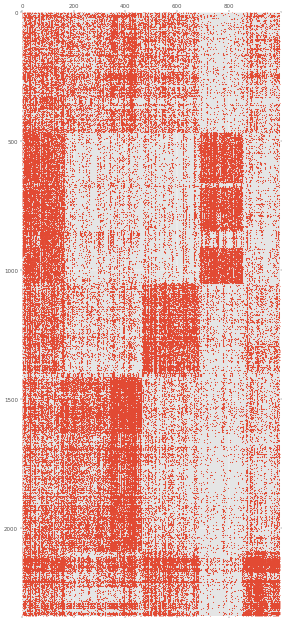

In [90]:
# plot the reorganized matrix
figure(num=None, figsize=(10, 20), dpi=40, facecolor='w', edgecolor='k')

subplot(1, 2, 1)
plot_reorganized_matrix(missX, coclustInfo_Imput)

figure(num=None, figsize=(10, 20), dpi=40, facecolor='w', edgecolor='k')
# plot the reorganized matrix
plot_reorganized_matrix(missX, coMod_model)

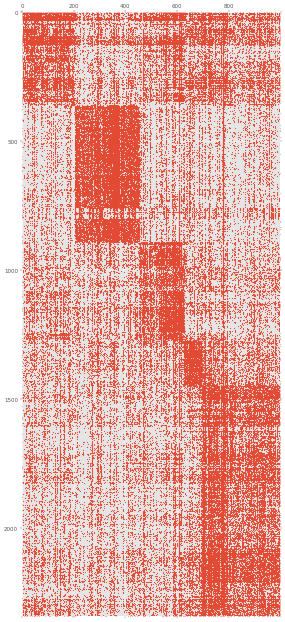

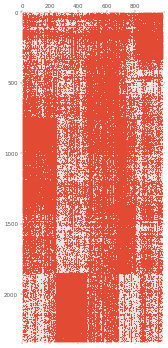

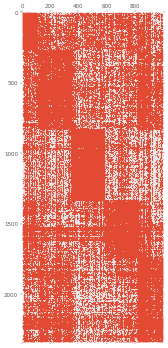

In [129]:
# plot the reorganized matrix
figure(num=None, figsize=(10, 20), dpi=40, facecolor='w', edgecolor='k')
subplot(1, 2, 1)
plot_reorganized_matrix(missX.values, coclustInfo_Imput)

figure(num=None, figsize=(10, 20), dpi=40, facecolor='w', edgecolor='k')
subplot(1, 2, 2)
plot_reorganized_matrix(missX2.values, coMod_model)

In [ ]:
'''
    print(X.shape)
    print(model.Z.shape)
    print(model.W.shape)

    print(model.W[0:5,:].todense())
    print()
    print(model.Z[0:5,:].todense())
'''

In [132]:
pca_orig = PCA(n_components=2).fit_transform(WebACE['fea'])
pca_miss = PCA(n_components=2).fit_transform(missX2.values)

Text(0.5, 1.0, 'PCA on MissMDA')

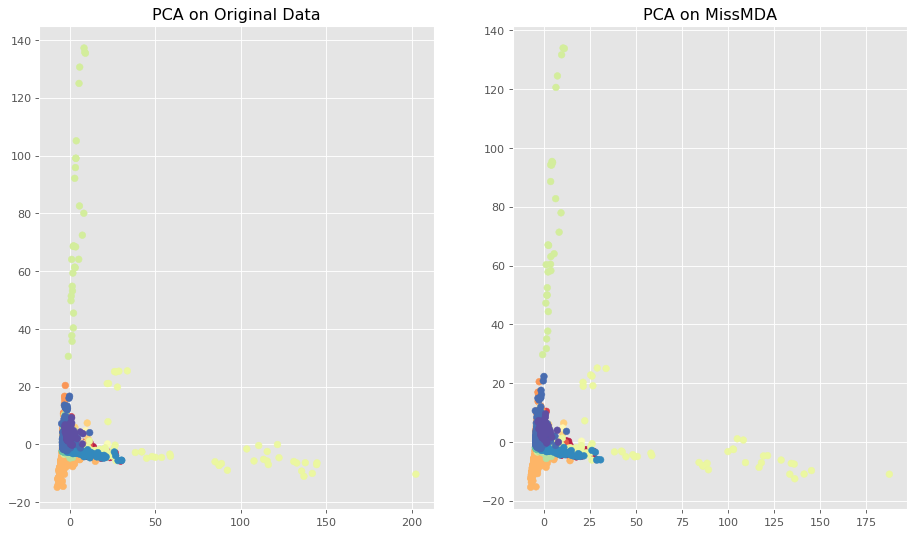

In [135]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = WebACE['gnd'][:,0]
## Isomap
subplot(1, 2, 1)
scatter(pca_orig[:,0], pca_orig[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Original Data')
## PCA
subplot(1, 2, 2)
scatter(pca_miss[:,0], pca_miss[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on MissMDA')

In [11]:
%cd coclust
#!os.chdir('./coclust')
!python3 setup.py install
%cd ..

/Users/amine/Desktop/Coclustering-Imputation/coclust
running install
running bdist_egg
running egg_info
writing coclust.egg-info/PKG-INFO
writing dependency_links to coclust.egg-info/dependency_links.txt
writing entry points to coclust.egg-info/entry_points.txt
writing requirements to coclust.egg-info/requires.txt
writing top-level names to coclust.egg-info/top_level.txt
reading manifest file 'coclust.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'coclust.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.15-x86_64/egg
running install_lib
running build_py
copying coclust/coclustering/coclust_info.py -> build/lib/coclust/coclustering
creating build/bdist.macosx-10.15-x86_64/egg
creating build/bdist.macosx-10.15-x86_64/egg/coclust
creating build/bdist.macosx-10.15-x86_64/egg/coclust/visualization
copying build/lib/coclust/visualization/__init__.py -> build/bdist.macosx-10.15-x86_64/egg/coclust/visualization
copying build/lib/coclu